In [1]:
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import xmltodict
import pprint
import geocoder
import folium
import seaborn as sns

DD_file = 'C:\\users\\student\\mypy\\data\\DD\\Drunk_Driving_2020.csv'
f = pd.read_csv(DD_file, encoding='euc-kr')
f.head()

df = pd.DataFrame(f)
df = df.set_index('연번')

df_police_xy = pd.read_pickle("det_by_reg_xy_col.pkl")
df_cnt_pivot = pd.read_pickle("df_cnt_pivot.pkl")

#folium 참고 사이트
#https://oboki.net/workspace/python/folium-%EC%A7%80%EB%A6%AC%EC%A0%95%EB%B3%B4-%EC%8B%9C%EA%B0%81%ED%99%94/

In [2]:
df = df.drop(df[df['알콜농도'] == '측정거부'].index)
df = df.drop(df[df['나이'] == '불명'].index)

df['나이'] = df['나이'].astype('int64')
df['알콜농도'] = df['알콜농도'].astype('float')

df

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
연번,,,,,,
1,남자,1,30,0.105,2020-01-01 0:03,일산동부경찰서
2,남자,1,57,0.077,2020-01-01 0:13,부산연제경찰서
3,남자,1,68,0.089,2020-01-01 0:17,부천소사경찰서
4,남자,1,39,0.133,2020-01-01 0:17,마산중부경찰서
6,남자,1,43,0.133,2020-01-01 0:21,창원중부경찰서
...,...,...,...,...,...,...
24797,남자,1,60,0.136,2020-03-31 23:55,양주경찰서
24798,남자,1,25,0.097,2020-03-31 23:57,인천미추홀경찰서
24799,남자,1,47,0.175,2020-03-31 23:57,서산경찰서


In [3]:
df_police_xy

,용인동부경찰서,용인서부경찰서,울산남부경찰서,울산동부경찰서,울산울주경찰서,울산중부경찰서,울진경찰서,원주경찰서,음성경찰서,의령경찰서,...,영암경찰서,영양경찰서,영월경찰서,영주경찰서,영천경찰서,예산경찰서,예천경찰서,오산경찰서,옥천경찰서,완도경찰서
0,127.180764,127.106174,129.310221,129.428937,129.242865,129.349383,129.397809,127.958153,127.689669,128.261519,...,126.699041,129.128150,128.467336,128.609648,128.906608,126.847229,128.451631,127.082165,127.568503,126.730521
1,37.241300,37.309587,35.535850,35.508624,35.569539,35.569514,36.984873,37.348301,36.926792,35.321134,...,34.797669,36.662073,37.184609,36.820485,35.952737,36.680279,36.657172,37.153782,36.298755,34.336224


In [4]:
df_cnt_pivot

,적발횟수
관할경찰서,
가평경찰서,40
강릉경찰서,140
강원고성경찰서,19
강진경찰서,22
거제경찰서,171
...,...
화성동탄경찰서,232
화성서부경찰서,220
화순경찰서,25


In [5]:
df_pivot = df.pivot_table(index=['관할경찰서'], values=['나이', '알콜농도'], aggfunc='mean')
df_pivot

,나이,알콜농도
관할경찰서,,
가평경찰서,45.625000,0.098550
강릉경찰서,44.653846,0.120485
강원고성경찰서,46.263158,0.092105
강진경찰서,55.047619,0.109905
거제경찰서,43.477987,0.115484
...,...,...
화성동탄경찰서,39.890909,0.120159
화성서부경찰서,42.661972,0.109038
화순경찰서,47.304348,0.125522


In [6]:
map_cnt = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in df_police_xy:
    marker = folium.CircleMarker([df_police_xy[key][1], df_police_xy[key][0]], radius=df_cnt_pivot.loc[key][0]/10, color='#3186cc',
                                 fill_color = '#3186cc', popup=key)
    marker.add_to(map_cnt)

map_cnt.save('map_cnt.html')
map_cnt

#https://www.seoul.co.kr/news/newsView.php?id=20031120011003

In [7]:
list_cnt = sorted(df_cnt_pivot['적발횟수'].items(), key = (lambda x: x[1]), reverse = True)
print('적발 건수 상위 10: ')
pprint.pprint(list_cnt[:10])
print('적발 건수 하위 10: ')
pprint.pprint(list_cnt[-10:])

적발 건수 상위 10: 
[('평택경찰서', 492),
 ('용인동부경찰서', 407),
 ('시흥경찰서', 371),
 ('수원남부경찰서', 308),
 ('광주광산경찰서', 292),
 ('구미경찰서', 291),
 ('파주경찰서', 288),
 ('천안서북경찰서', 280),
 ('울산남부경찰서', 278),
 ('서울강남경찰서', 271)]
적발 건수 하위 10: 
[('단양경찰서', 11),
 ('인제경찰서', 9),
 ('함평경찰서', 9),
 ('군위경찰서', 8),
 ('구례경찰서', 7),
 ('장수경찰서', 7),
 ('곡성경찰서', 6),
 ('의령경찰서', 6),
 ('임실경찰서', 6),
 ('영양경찰서', 4)]


In [8]:
map_10_cnt = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_cnt[:10]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_cnt)
    
map_10_cnt.save('map_+10_cnt.html')
map_10_cnt

In [9]:
map_10_cnt = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_cnt[-10:]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_cnt)
    
map_10_cnt.save('map_-10_cnt.html')
map_10_cnt

In [10]:
list_den = sorted(df_pivot['알콜농도'].items(), key = (lambda x: x[1]), reverse = True)
list_den

print('평균 알콜 농도 상위 10: ')
pprint.pprint(list_den[:10])
print('평균 알콜 농도 하위 10: ')
pprint.pprint(list_den[-10:])

#상위 10에 서울 지역이 많이 보인다?

평균 알콜 농도 상위 10: 
[('곡성경찰서', 0.1605),
 ('보은경찰서', 0.1453076923076923),
 ('단양경찰서', 0.14529999999999998),
 ('화천경찰서', 0.14483333333333334),
 ('정선경찰서', 0.14270588235294115),
 ('동해경찰서', 0.13834782608695653),
 ('서울서부경찰서', 0.13736585365853662),
 ('서울중부경찰서', 0.13673529411764707),
 ('서울남대문경찰서', 0.13657142857142857),
 ('서울은평경찰서', 0.13618750000000002)]
평균 알콜 농도 하위 10: 
[('인제경찰서', 0.09344444444444444),
 ('함양경찰서', 0.09282608695652175),
 ('강원고성경찰서', 0.09210526315789473),
 ('영양경찰서', 0.09125),
 ('광주동부경찰서', 0.09053125000000004),
 ('구리경찰서', 0.08793162393162388),
 ('거창경찰서', 0.08663888888888888),
 ('경남고성경찰서', 0.08348275862068964),
 ('함평경찰서', 0.082),
 ('군위경찰서', 0.07612499999999998)]


In [11]:
map_10_den = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_den[:10]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_den)
    
map_10_den.save('map_+10_den.html')
map_10_den

In [12]:
map_10_den = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_den[-10:]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_den)
    
map_10_den.save('map_-10_den.html')
map_10_den

In [13]:
list_age = sorted(df_pivot['나이'].items(), key = (lambda x: x[1]), reverse = True)
list_age
print('평균 나이 상위 10: ')
pprint.pprint(list_age[:10])
print('평균 나이 하위 10: ')
pprint.pprint(list_age[-10:])

평균 나이 상위 10: 
[('남해경찰서', 56.7),
 ('군위경찰서', 56.375),
 ('구례경찰서', 55.857142857142854),
 ('하동경찰서', 55.25),
 ('강진경찰서', 55.04761904761905),
 ('의성경찰서', 54.77777777777778),
 ('서천경찰서', 53.916666666666664),
 ('청송경찰서', 53.333333333333336),
 ('보성경찰서', 52.833333333333336),
 ('단양경찰서', 52.8)]
평균 나이 하위 10: 
[('서울동작경찰서', 37.94805194805195),
 ('서울서초경찰서', 37.917355371900825),
 ('부산남부경찰서', 37.824742268041234),
 ('서울수서경찰서', 37.632183908045974),
 ('서울마포경찰서', 37.52173913043478),
 ('수원남부경찰서', 36.70134228187919),
 ('대구남부경찰서', 36.534246575342465),
 ('대전둔산경찰서', 36.29807692307692),
 ('대구중부경찰서', 35.89795918367347),
 ('서울강남경찰서', 35.81395348837209)]


In [14]:
map_10_age = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_age[:10]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_age)
    
map_10_age.save('map_+10_age.html')
map_10_age

In [15]:
map_10_age = folium.Map(location=[35.8,127.5],zoom_start=6.5)

for key in list_age[-10:]:
    marker = folium.Marker(location = [df_police_xy[key[0]][1], df_police_xy[key[0]][0]], popup=key[0], icon = folium.Icon(color = 'red', icon = 'star'))
    marker.add_to(map_10_age)
    
map_10_age.save('map_-10_age.html')
map_10_age

In [16]:
file = 'C:\\users\\student\\mypy\\data\\DD\\avg_age_2018.csv'
f = pd.read_csv(file, encoding='euc-kr')
f.head()

,행정구역별,평균연령
0,서울특별시,41.9
1,부산광역시,43.6
2,대구광역시,42.1
3,인천광역시,41.0
4,광광주,40.1


In [17]:
df_pop = pd.DataFrame(f)
df_pop_origin = df_pop
df_pop.head()

,행정구역별,평균연령
0,서울특별시,41.9
1,부산광역시,43.6
2,대구광역시,42.1
3,인천광역시,41.0
4,광광주,40.1


In [18]:
for k in range(len(df_pop['행정구역별'])):
    df_pop['행정구역별'][k] = df_pop['행정구역별'][k][0:2]

df_pop = df_pop.set_index('행정구역별')
df_pop_origin = df_pop_origin.set_index('행정구역별')

df_pivot['평균연령'] = np.NaN
df_pivot['평균연령'] = df_pivot['평균연령'].astype('float64')

C:\Users\student\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
for idx in df_pivot.index:
    if idx[0:2] in df_pop.index:
        df_pivot['평균연령'][idx] = df_pop.loc[idx[0:2]]['평균연령']

In [20]:
sum(df_pivot['평균연령'].isnull())

15

In [21]:
df_pivot[df_pivot['평균연령'].isin([np.NaN])]

,나이,알콜농도,평균연령
관할경찰서,,,
강원고성경찰서,46.263158,0.092105,NaN
경남고성경찰서,49.965517,0.083483,NaN
광주경찰서,43.492611,0.102532,NaN
광주광산경찰서,41.714286,0.107246,NaN
광주남부경찰서,42.923077,0.101821,NaN
광주동부경찰서,38.546875,0.090531,NaN
광주북부경찰서,40.899563,0.105472,NaN
광주서부경찰서,39.401786,0.117165,NaN
마산동부경찰서,42.000000,0.109815,NaN


In [22]:
df_pivot['평균연령']['강원고성경찰서'] = df_pop_origin['평균연령']['강고']
df_pivot['평균연령']['경남고성경찰서'] = df_pop_origin['평균연령']['경고']
df_pivot['평균연령']['광주경찰서'] = df_pop_origin['평균연령']['경광']
df_pivot['평균연령']['광주광산경찰서'] = df_pop_origin['평균연령']['광광']
df_pivot['평균연령']['광주남부경찰서'] = df_pop_origin['평균연령']['광광']
df_pivot['평균연령']['광주동부경찰서'] = df_pop_origin['평균연령']['광광']
df_pivot['평균연령']['광주북부경찰서'] = df_pop_origin['평균연령']['광광']
df_pivot['평균연령']['광주서부경찰서'] = df_pop_origin['평균연령']['광광']
df_pivot['평균연령']['마산동부경찰서'] = df_pop_origin['평균연령']['창원']
df_pivot['평균연령']['마산중부경찰서'] = df_pop_origin['평균연령']['창원']
df_pivot['평균연령']['분당경찰서'] = 40.1
df_pivot['평균연령']['의정부경찰서'] = 41.7
df_pivot['평균연령']['일산동부경찰서'] = 41.2
df_pivot['평균연령']['일산서부경찰서'] = 40.7
df_pivot['평균연령']['진해경찰서'] = 40.0

In [23]:
sum(df_pivot['평균연령'].isnull())

0

C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 miss

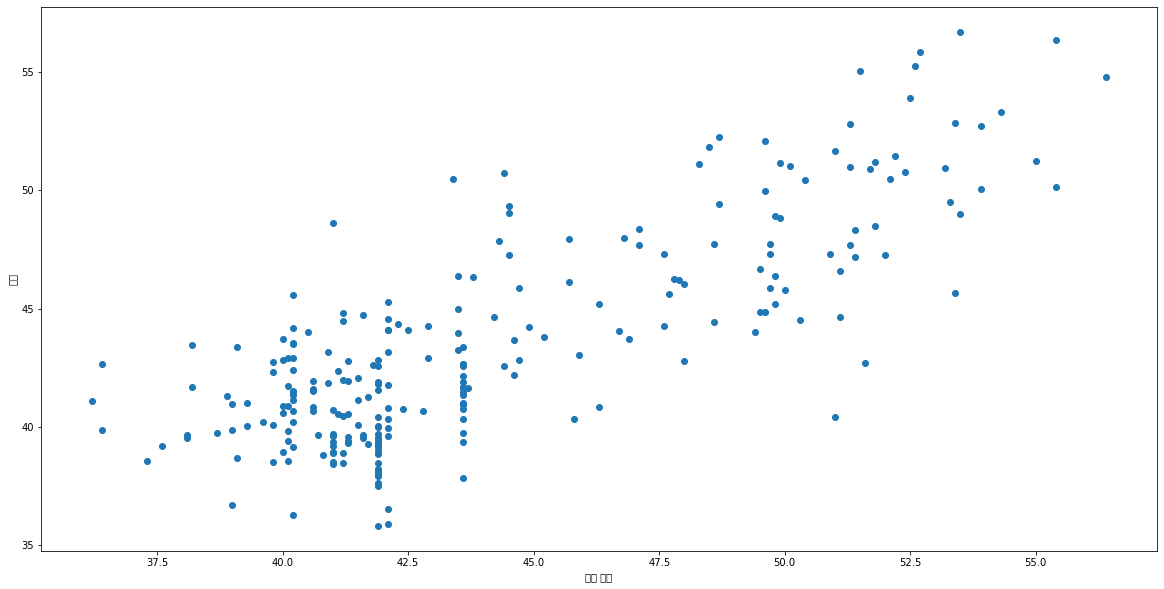

In [24]:
plt.figure(figsize=(20,10))
x = df_pivot['평균연령']
y = df_pivot['나이']

plt.xlabel('평균 연령')
plt.ylabel('나이')

plt.scatter(x,y)
plt.show()

In [25]:
df_pivot['나이'].corr(df_pivot['평균연령'])

0.7985161003402326